In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures



d_house = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [56]:
#a)
X = d_house.sqft_living.values.reshape(-1,1)[:1000]
Y = d_house.price.values.reshape(-1)[:1000]
model = LinearRegression()
model = model.fit(X,Y)
#Hint: .fit()

> *Komentarz:* Tutaj tworzymy prostą regresję liniową dwuwymiarową, która dopasuje prostą do danych, które podajemy

Absolute error:  162723.91828198463


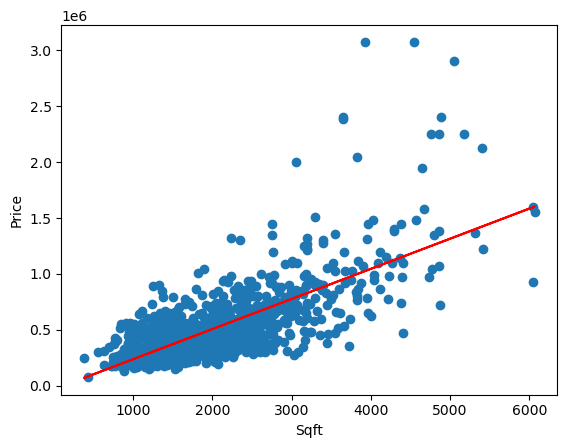

In [57]:
#b)
#Your code:
plt.scatter(X,Y)
plt.plot(X.reshape(-1), model.predict(X).reshape(-1,1), color='red')
plt.xlabel('Sqft')
plt.ylabel('Price')
print("Absolute error: ",mean_absolute_error(Y,model.predict(X)))
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

> *Komentarz:* Jak widać całkiem nieźle owe dane są przybliżane, choć błąd jest duży, to regresja nieźle dopasowała się nam do danych, oczywiście na tak duży błą∂ wpływa pewnie, obecność "outlinerów", którzy zaburzają trochę zależność liniową

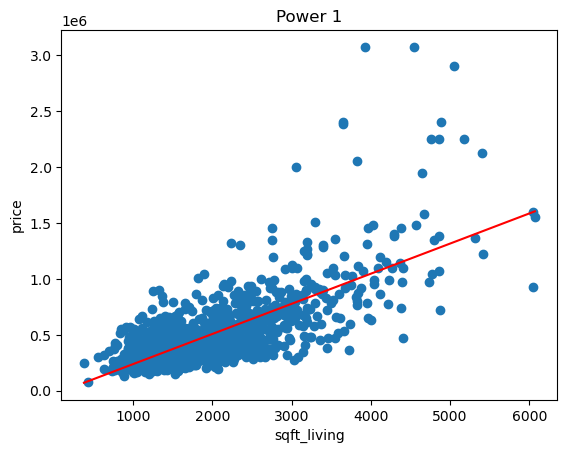

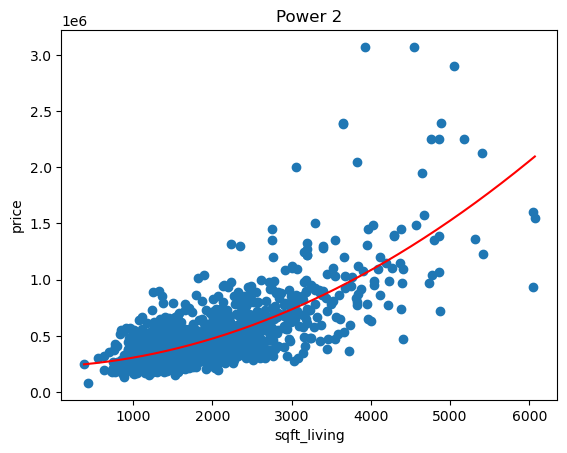

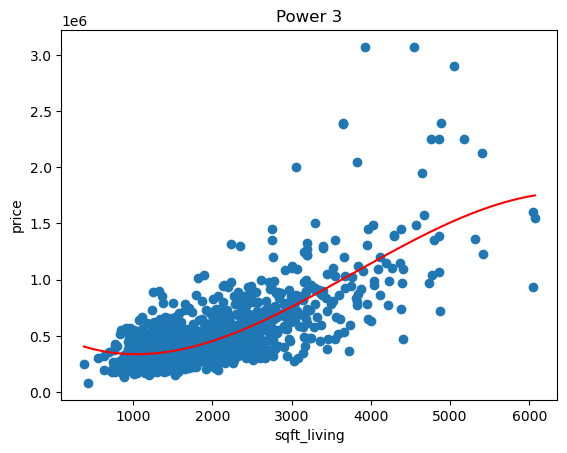

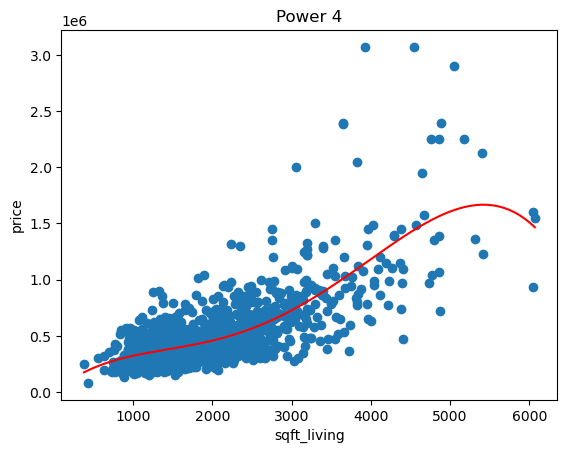

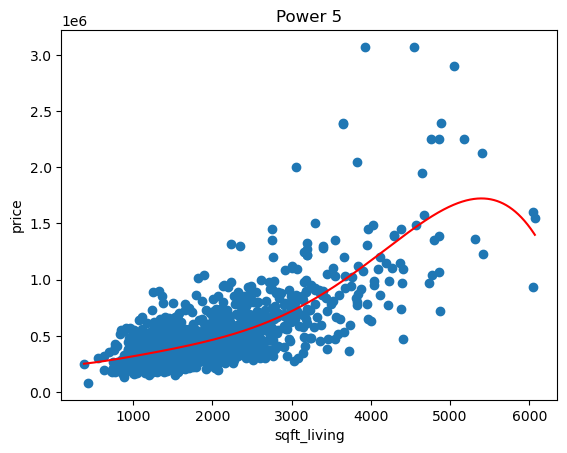

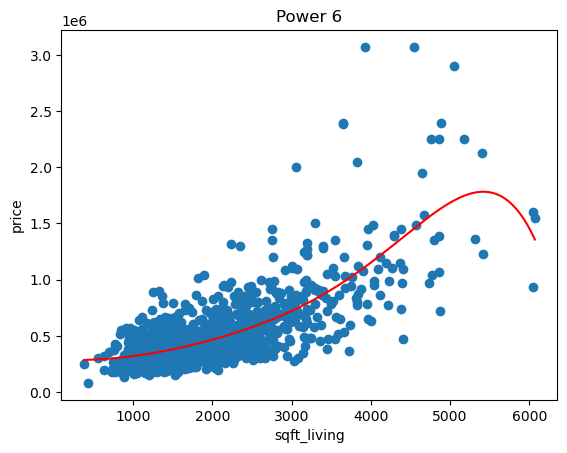

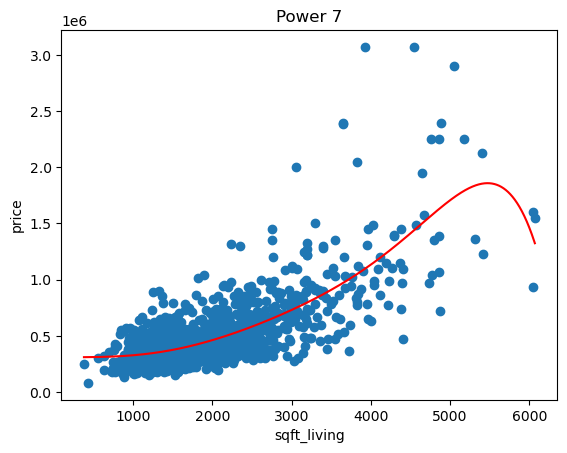

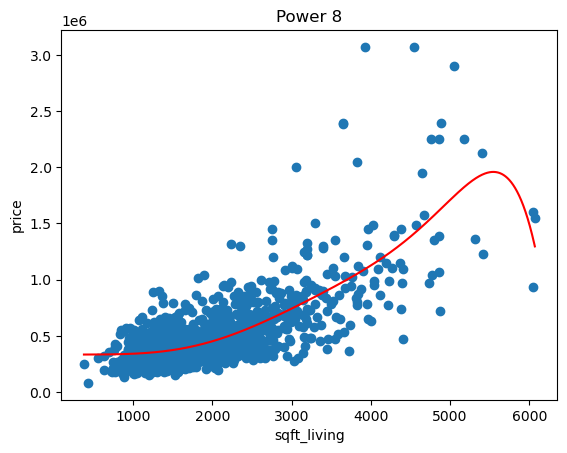

In [58]:
#c)
error = []
for order in range(1,9):
    plt.scatter(X,Y)
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_transformed = poly.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_transformed, Y)
    
    X_range = np.arange(X.min(), X.max(), 0.1).reshape(-1,1)
    
    X_range_transformed = poly.fit_transform(X_range)
    
    Y_predicted = model.predict(X_range_transformed)
    
    plt.plot(X_range,Y_predicted, color='red')

    error.append(mean_squared_error(Y,model.predict(X_transformed)))
    
    plt.title("Power "+str(order))
    
    plt.xlabel("sqft_living")
    plt.ylabel("price")
    
    
    
    plt.show()
    #Your code:


*Komentarz:* Widzimy, że im większy stopień wielomiany to nie znaczy, że funckja lepiej dopasuje nam się do kształtu danych, tutaj na pierwszy rzuk oka najlepiej dopasowuje nam się funkcja kwadratowa, ale błąd na dole pokazuje coś innego, że najlepiej do DANYCH dopasowany jest wieloman 7 stopnia, co istotne dopasowanie nie zawsze musi świadczyć o tym, że dobrze zgeneralizowaliśmy problem, bo może się zdarzyć, że jeśli zaczniemy dalej zbierać dane, to okaże się, że zależność miedzy danymi przybiera kształt, funkcji kwadratowej(albo czegoś na kształt wzrastającej funkcji hiperbolicznej), a więc, pomimo, że nasza funkcja dobrze dopasuje sie do danych, nie świadczy o poprawnie zgeneralizowanym problemie

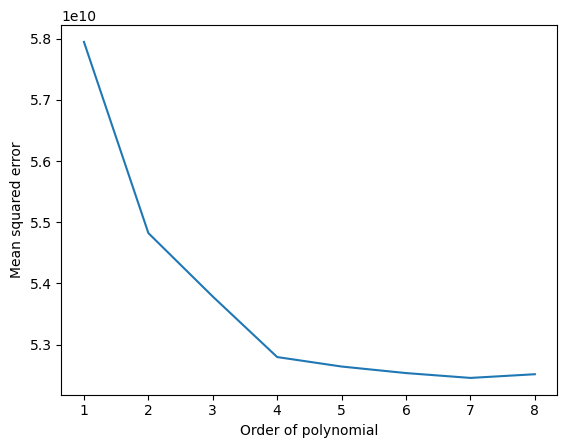

In [59]:
plt.plot([i for i in range(1,9)],error)
plt.xlabel("Order of polynomial")
plt.ylabel("Mean squared error")
plt.show()

*Komentarz:* Tutaj w zasadzie jest ta zależność która omówiłem na górze, funkcja lepiej dopasował się do danych, bo miał więcej punktów swobody

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 

b). Plot training and test errors for all models. 

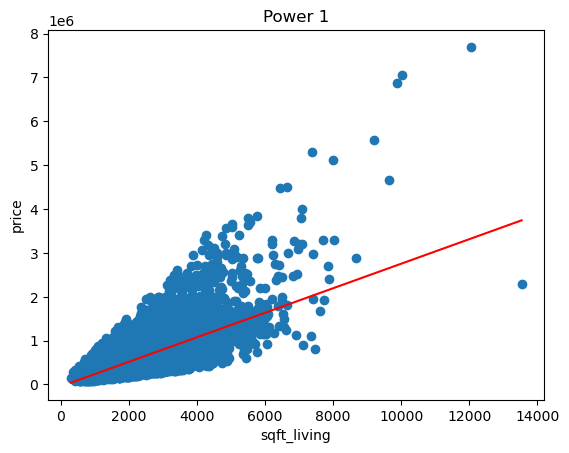

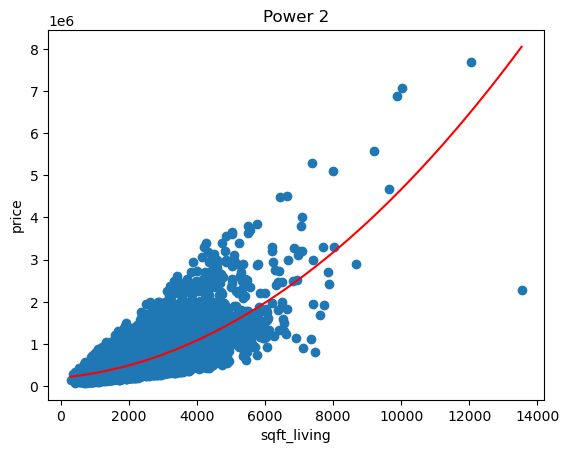

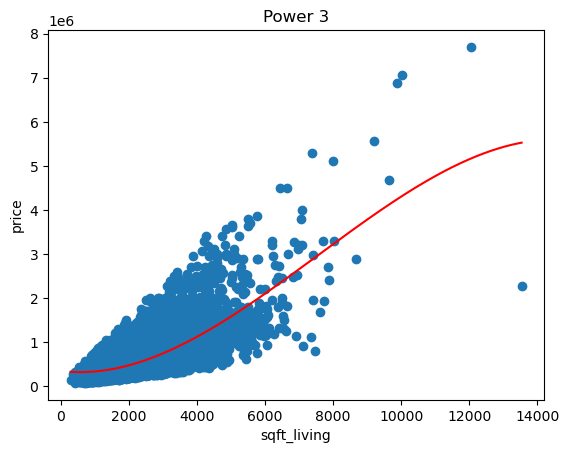

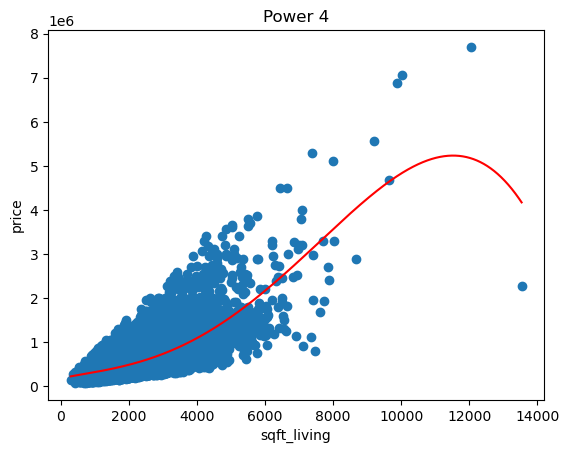

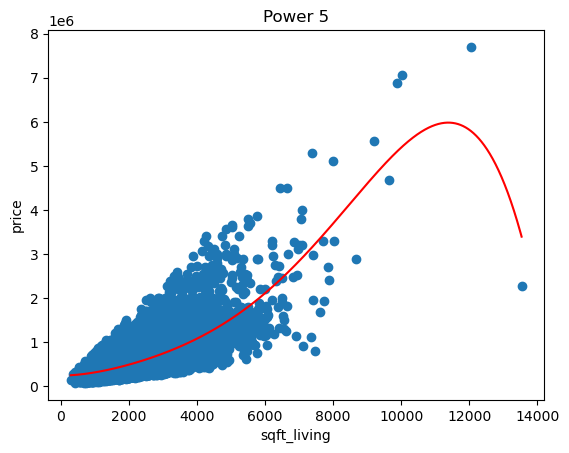

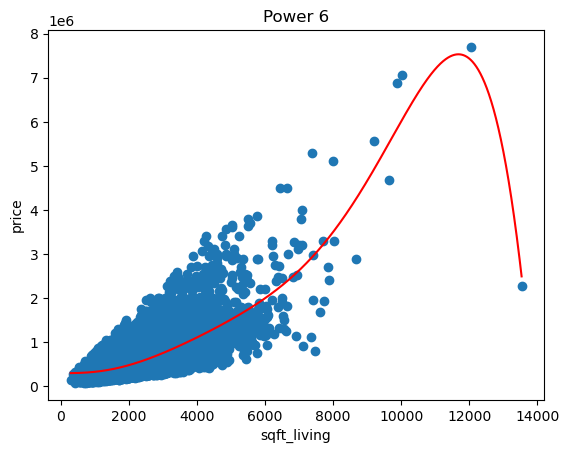

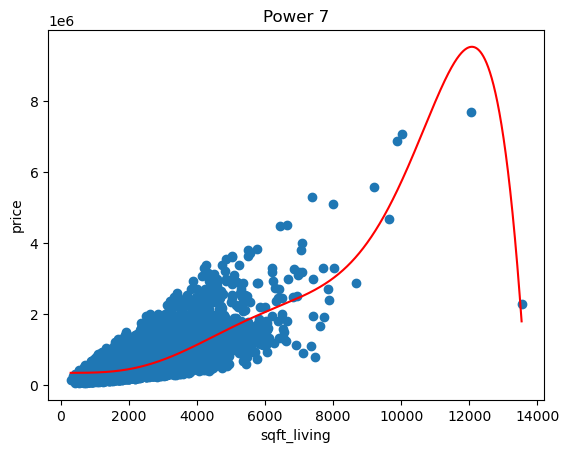

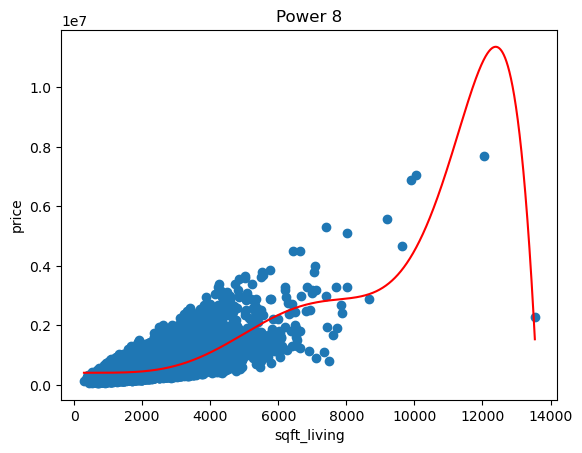

In [60]:
# a)
error_train = []
error_test = []
for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_train, X_test, Y_train, Y_test = train_test_split(d_house.sqft_living.values.reshape(-1,1), d_house.price.values.reshape(-1), test_size=0.2, random_state=44)
    plt.scatter(X_train,Y_train)
    X_transformed = poly.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(X_transformed, Y_train)
    
    X_range = np.arange(X_train.min(), X_train.max(), 0.1).reshape(-1,1)
    X_range_transformed = poly.fit_transform(X_range)
    
    Y_predicted = model.predict(X_range_transformed)
    
    plt.plot(X_range,Y_predicted, color='red')

    error_train.append(mean_squared_error(Y_train,model.predict(poly.fit_transform(X_train))))
    error_test.append(mean_squared_error(Y_test,model.predict(poly.fit_transform(X_test))))
    
    plt.title("Power "+str(order))
    
    plt.xlabel("sqft_living")
    plt.ylabel("price")
    plt.show()
    #Your code:

*Komentarz:* W zasadzie istotą trenowania czegoś, jest generalizacja, a więc tworzymy dwa zbiory jeden do treningu modelu, a drugi po to aby sprawdzić, czy nasza funckja dobrze przewiduje także wartości dla danych, których nigdy nie widziała, a więc widzimy, że dopasowanie funkcji jest w miare podobne(pozwoliłem użyć sobie całego zbioru danych), ale błąd już się zmienia, widzimy, że błąd testowy jest o wiele, więskzy chodź jednak wszystko okazuje się, że dla wielomianu o stopniu 6 jest on najmniejszy. Daję nam to wiekszą pewnośc, że nasz model będzie lepiej przewidywał wartości na podstawie czegoś, czego wcześniej nie widział 

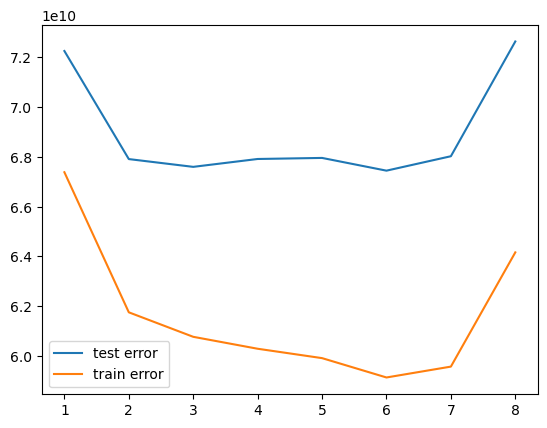

In [61]:
plt.plot([i for i in range(1,9)],error_test)
plt.plot([i for i in range(1,9)],error_train)
plt.legend(['test error','train error'])

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

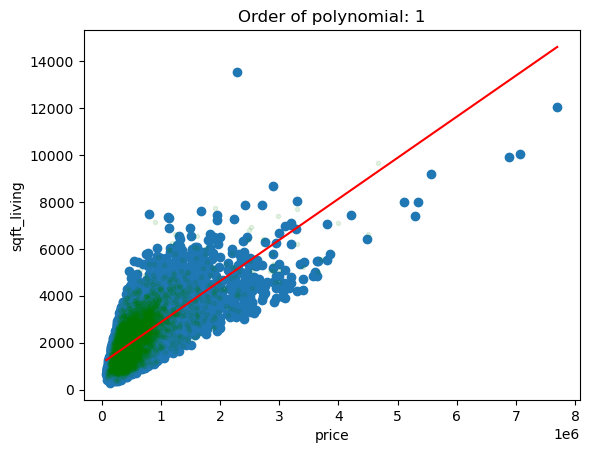

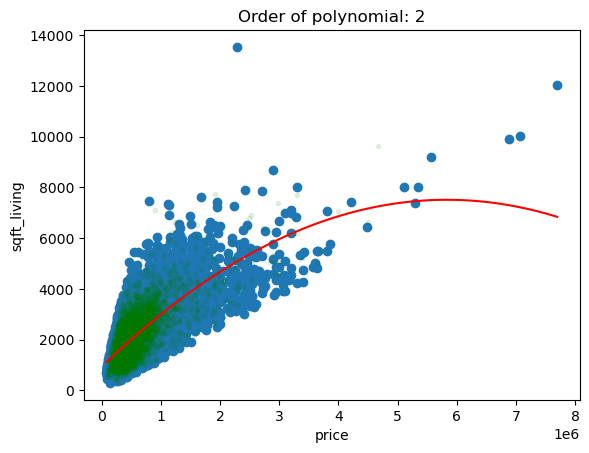

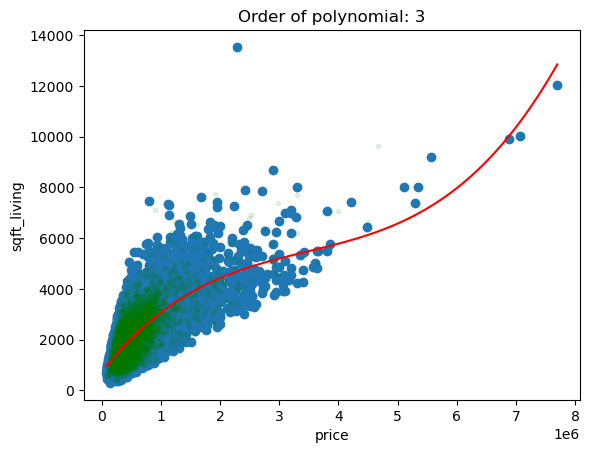

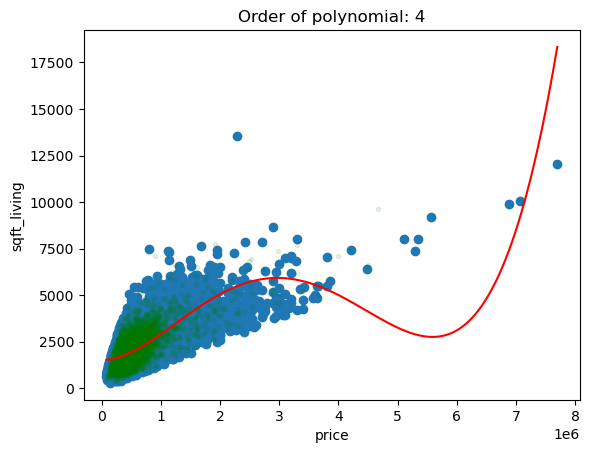

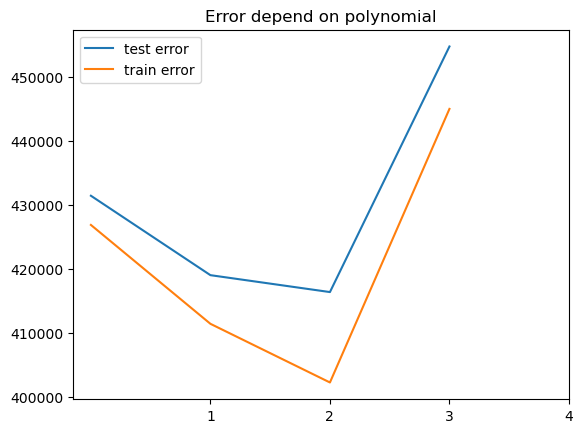

In [62]:
#a)
error_train = []
error_test = []
X = d_house.price.values.reshape(-1,1)
Y = d_house.sqft_living.values.reshape(-1)

X_train, X_test, Y_train ,Y_test = train_test_split(X, Y, test_size=0.2, random_state=48)

for order in range(1,5):
    plt.scatter(X_train,Y_train)
    plt.scatter(X_test,Y_test, alpha=0.1, color='green', marker='.')
    poly = PolynomialFeatures(order, include_bias = False)
    X_transformed = poly.fit_transform(X_train)
    
    model = LinearRegression()
    model = model.fit(X_transformed, Y_train)
    
    X_range = np.arange(X_train.min(), X_train.max(), 1).reshape(-1,1)
    X_range_transformed = poly.fit_transform(X_range)
    Y_predicted = model.predict(X_range_transformed)
    plt.plot(X_range,Y_predicted, color='red')
    error_test.append(mean_squared_error(Y_test,model.predict(poly.fit_transform(X_test))))
    error_train.append(mean_squared_error(Y_train,model.predict(poly.fit_transform(X_train))))
    plt.title(f"Order of polynomial: {order}")
    plt.ylabel("sqft_living")
    plt.xlabel("price")
    plt.show()
plt.plot(error_test)
plt.plot(error_train)
plt.xticks([i for i in range(1,5)])
plt.title("Error depend on polynomial")
plt.legend(['test error','train error'])
plt.show()

*Komentarz:* Tutaj, praktycznie to samo co u górze, tylko mamy inne dane. Tutaj o wiele lepiej radzi sobie wielomian rzędu 2, co również istotne dane, są bardziej rozłożone po przestrzeni, a więc nasze zadanie aproksymacji staję się trochę cięższe. Powiedziałbym, że pomimo takich trudności to i tak udało mi się w miarę dobrze zgeneralizować funkcję i aproksymuje ona wynik, w miare dobrze 

In [63]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

def preditct(X_func,Y_func):
    error = []
    for order in range(1,6):
        poly = PolynomialFeatures(order, include_bias = False)
        X_order = poly.fit_transform(X_func)
        
        X_train, X_test, Y_train, Y_test = train_test_split(X_order, Y_func, test_size=0.5, random_state=43)
    
                    
        model = LinearRegression() 
        model = model.fit(X_train, Y_train) 
        
        Y_pred = model.predict(X_test)
        error.append(mean_squared_error(Y_pred, Y_test))
    return (min(error),error.index(min(error))+1)

Y = d_house.price.values.reshape(-1)
X0 = d_house[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
X1 = d_house[['sqft_lot15', 'sqft_living15', 'zipcode', 'sqft_above', 'grade', 'sqft_lot', 'sqft_living','view','condition','lat','long']].values
best = preditct(X1,Y)
to_beat = preditct(X0,Y)
print(f"Best mean squared error to beat: 48749900202.864044")
print(f"Mean squared error equals: {best[0]} | And polynomial order is {best[1]}")

#Your model:


Best mean squared error to beat: 48749900202.864044
Mean squared error equals: 31768006323.63215 | And polynomial order is 2


> *Komentarz:* Tutaj metodą prób i błędów wybrałem odpowiednie featury, aby dostać jak najmniejszy błąd, co prawda trenowanie tego zajmuje około minuty, ale wyniki są prawie 1.7 raza lepsze od tego co mieliśmy poprzednio. 